In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import LabelEncoder
#from sklearn import metrics as mt
import datetime as dt
#from sklearn.preprocessing import StandardScaler

In [2]:
#sc=StandardScaler()

In [3]:
data=pd.read_csv(r"TCS-NSE.csv")
#df1=pd.DataFrame(data)
df=pd.DataFrame(data)
#df.shape
#df.describe()
df.dropna(inplace=True)
#df.sort_index(ascending=False,inplace=True)
df


,Date,Open Price,High Price,Low Price,Close Price,Traded Value^,No. Of Trades,Traded Quantity
0,07-09-2023,"3,430.80","3,460.00","3,422.30","3,455.25",649.20,143528,1885092
1,06-09-2023,"3,434.00","3,443.90","3,398.10","3,429.90",450.25,99523,1314818
2,05-09-2023,"3,420.00","3,447.00","3,405.15","3,429.35",515.19,100120,1501842
3,04-09-2023,"3,378.00","3,432.85","3,370.05","3,418.50",622.57,114654,1828332
4,01-09-2023,"3,366.00","3,389.00","3,356.80","3,379.20",431.94,148744,1277950
...,...,...,...,...,...,...,...,...
4719,01-09-2004,990.00,995.00,983.60,987.90,246.62,43844,2491943
4720,31-08-2004,986.50,990.00,976.00,988.10,260.21,44115,2649332
4721,30-08-2004,969.90,990.00,965.00,986.75,300.51,58748,3058151
4722,27-08-2004,982.40,982.40,958.55,962.65,371.56,75524,3830750


In [4]:
df["Date"]=pd.to_datetime(df["Date"],format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4724 non-null   datetime64[ns]
 1   Open Price       4724 non-null   object        
 2   High Price       4724 non-null   object        
 3   Low Price        4724 non-null   object        
 4   Close Price      4724 non-null   object        
 5   Traded Value^    4724 non-null   object        
 6   No. Of Trades    4724 non-null   int64         
 7   Traded Quantity  4724 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 295.4+ KB


In [5]:
#f["Traded Quantity"]=sc.fit_transform(df[["Traded Quantity"]])
df.sort_values(by=["Date"],ascending=True,inplace=True)
df

,Date,Open Price,High Price,Low Price,Close Price,Traded Value^,No. Of Trades,Traded Quantity
4723,2004-08-26,992.00,997.00,975.30,979.00,498.29,97524,5055400
4722,2004-08-27,982.40,982.40,958.55,962.65,371.56,75524,3830750
4721,2004-08-30,969.90,990.00,965.00,986.75,300.51,58748,3058151
4720,2004-08-31,986.50,990.00,976.00,988.10,260.21,44115,2649332
4719,2004-09-01,990.00,995.00,983.60,987.90,246.62,43844,2491943
...,...,...,...,...,...,...,...,...
4,2023-09-01,"3,366.00","3,389.00","3,356.80","3,379.20",431.94,148744,1277950
3,2023-09-04,"3,378.00","3,432.85","3,370.05","3,418.50",622.57,114654,1828332
2,2023-09-05,"3,420.00","3,447.00","3,405.15","3,429.35",515.19,100120,1501842
1,2023-09-06,"3,434.00","3,443.90","3,398.10","3,429.90",450.25,99523,1314818


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4724 entries, 4723 to 0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4724 non-null   datetime64[ns]
 1   Open Price       4724 non-null   object        
 2   High Price       4724 non-null   object        
 3   Low Price        4724 non-null   object        
 4   Close Price      4724 non-null   object        
 5   Traded Value^    4724 non-null   object        
 6   No. Of Trades    4724 non-null   int64         
 7   Traded Quantity  4724 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 332.2+ KB


In [7]:
df["Open Price"]=df["Open Price"].str.replace(",","")
df["High Price"]=df["High Price"].str.replace(",","")
df["Low Price"]=df["Low Price"].str.replace(",","")
df["Traded Value^"]=df["Traded Value^"].str.replace(",","")
df["Close Price"]=df["Close Price"].str.replace(",","")

In [8]:
df["Close Price"]=df["Close Price"].astype("float64")
df["Open Price"]=df["Open Price"].astype("float64")
df["High Price"]=df["High Price"].astype("float64")
df["Low Price"]=df["Low Price"].astype("float64")
df["Traded Value^"]=df["Traded Value^"].astype("float64")

In [9]:
X=df.drop(["Close Price"],axis=1)
Y=df["Close Price"]
#X["Date"]=X["Date"].astype("Int64")//10*9

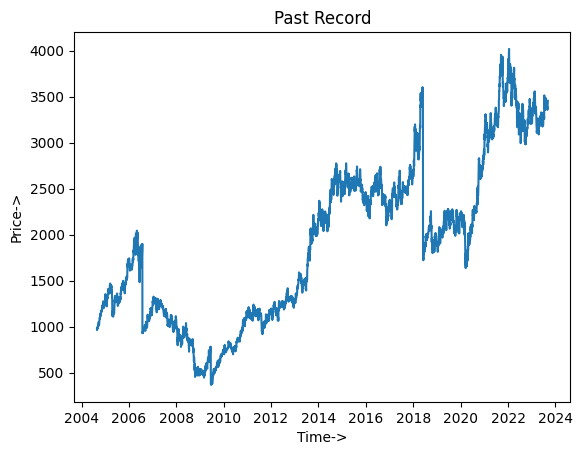

In [32]:
ax=plt.subplot()
plt.title("Past Record")
plt.xlabel("Time->")
plt.ylabel("Price->")
#plt.bar(df["Date"],df["Total Trade Quantity"],color="red")
#plt.yticks(rotation=45)
#plt.subplot(2,2,2)
plt.plot(df["Date"],df["Close Price"])
#ax2=ax.twinx()
#ax2.plot(df["Date"],df["Traded Quantity"],color="grey")
#plt.ylabel("volume")

In [34]:
df.isnull().sum()

Date               0
Open Price         0
High Price         0
Low Price          0
Close Price        0
Traded Value^      0
No. Of Trades      0
Traded Quantity    0
dtype: int64

In [24]:
#X.drop(["Date"],axis=1)
#x_train,x_test,y_train,y_test=train_test_split(X,Y)
x_train=X.iloc[:1000]
y_train=Y.iloc[:1000]
x_test=X.iloc[1000:]
y_test=Y.iloc[1000:]

In [25]:
#a=pd.DataFrame([[dt.date(2025,3,31),5210.00,5280.00,5251.00,1009.00,100050,3020460]])
#a[6]=sc.fit_transform()
#b=a.iloc[:,1:]
#b

In [26]:
linr=LinearRegression()
logr=LogisticRegression()
#X.drop(["Date"],axis=1,inplace=True)
#x_train=x_train.drop(["Date"],axis=1)
xtrn=x_train.drop(["Date"],axis=1)


In [27]:
xtst=x_test.drop(["Date"],axis=1)
linr.fit(xtrn,y_train)
linpred=linr.predict(xtst)

In [28]:
#logr.fit(xtrn,y_train)

In [29]:
linr.score(xtrn,y_train)
#x_train["Date"].shape

0.9980849939008848

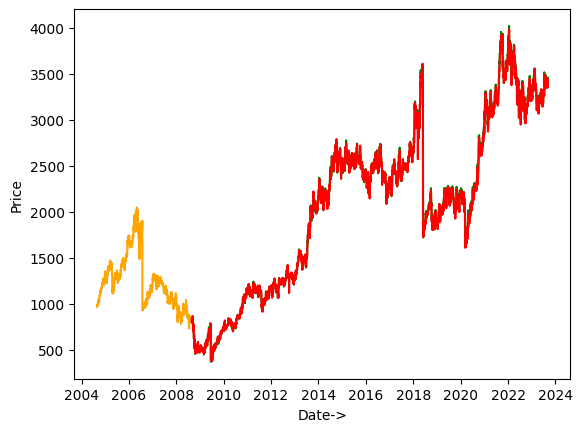

In [30]:
#plt.subplot(2,2,2)
plt.plot(x_test["Date"],y_test,color="green")
plt.plot(x_train["Date"],y_train,color="orange")
plt.plot(x_test["Date"],linpred,"red")
#plt.scatter(a[0],linr.predict(b),color="red",marker="*")
plt.xlabel("Date->")
plt.ylabel("Price")
plt.show()
#print("Price on ",a.iloc[0,0]," will be")
#print((linr.predict(b)))
